In [ ]:
#Code for the data treatment

In [1]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Database
data=pd.read_csv("/Users/juanfelipegonzalez/Desktop/DEFINITIF-BDD.csv",sep=",",encoding="utf-8",engine="python")


In [4]:
#I/- DATA TREATMENT
data[" FOOD "]=data[" FOOD "].convert_objects(convert_numeric=True)
data[" FOOD "].mean()
data["SERVICE"].mean()
data["VALUE"].mean()
data["GRADE"]=data["GRADE"].convert_objects(convert_numeric=True)
data["GRADE"].mean();

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [5]:
#Extracting list of unique values for any column
def unique_column (data,column_name):
    array= []
    for x in data[column_name]:
        new=str.split(str(x),",")
        for i in new:
            if i not in array: 
                array.append(i)
    return(array)

In [6]:
# adding new columns and binary values

def split_columns(data,column,names):
    for g in names:
        new_column=[]
        for i,x in enumerate(data[column]):
            new=str.split(str(x),",")
            new2=str(new).replace(" ", "")
            g2=str(g).replace(" ", "")
            if g2 in new2:
                new_column.append(1)
            else:
                new_column.append(0)

        data[str(g2)]= new_column

In [7]:
data2=data.copy()

In [8]:
good_for= unique_column(data,"GOOD FOR")
dinning_style= unique_column(data,"DINNING STYLES")
features= unique_column(data,"FEATURES")

In [9]:
good_for= [' Business meetings', ' Romantic', ' Special occasions', ' Large groups', 
           'Families with children', ' Kids', ' Bar scene', ' Local cuisine',
           ' Scenic view']
dinning_style= ['Lunch', ' Dinner', ' Late Night', 'Breakfast',' Brunch', ' Drinks']
features=['Reservations', ' Private Dining', ' Wheelchair Accessible', 
          ' Serves Alcohol', 'Takeout', ' Television', ' Free Wifi',
          ' Delivery', ' Accepts Credit Cards', ' Outdoor Seating', 
          ' Buffet',' Parking Available']

In [10]:
#FEATURES TRANSFORMATIONS TO BINARY COLUMNS
split_columns(data2,"DINNING STYLES",dinning_style)
split_columns(data2,"GOOD FOR",good_for)
split_columns(data2,"FEATURES",features)


In [11]:
def function(x):
    if type(x)==int:
        return float(x)
    else:
        return x

In [12]:
# II/-DATA VISUALIZATION

#GROUP BY RESTAURANTS
a=data2.groupby(['ADDRESS']).mean()

In [13]:
a["VALUE"]=a["VALUE"].fillna(a["GRADE"]) 
a["SERVICE"]=a["SERVICE"].fillna(a["GRADE"]) 
a[" FOOD "]=a[" FOOD "].fillna(a["GRADE"]) 


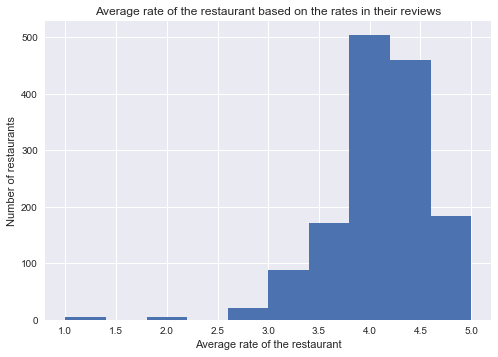

In [67]:
#HISTOGRAM OF THE RESTAURANTS ACCORDING TO THE GRADES
'''
- Normal distribution around 4.1 
- Bonne distribution
- Limite de TripAdvisor
'''
plt.hist(a["GRADE"],bins=10);
plt.ylabel('Number of restaurants')
plt.xlabel('Average rate of the restaurant')
plt.title('Average rate of the restaurant based on the rates in their reviews')

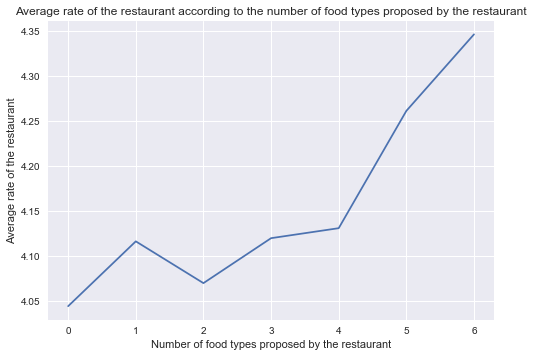

In [69]:
#Grades according to the number of foods that the restaurants proposed
b=a.groupby(['NUMBER OF FOODS']).mean()
plt.xlabel('Number of food types proposed by the restaurant')
plt.ylabel('Average rate of the restaurant')
plt.title('Average rate of the restaurant according to the number of food types proposed by the restaurant')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14bf27b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14b0f2160>]], dtype=object)

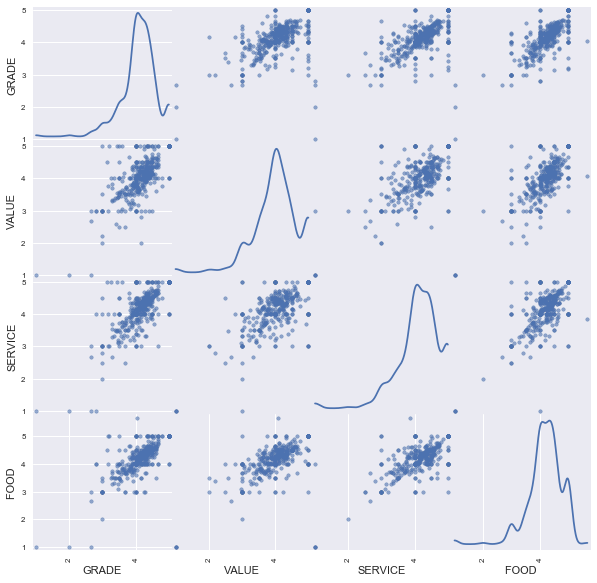

In [215]:
#CORRELATIONS
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')

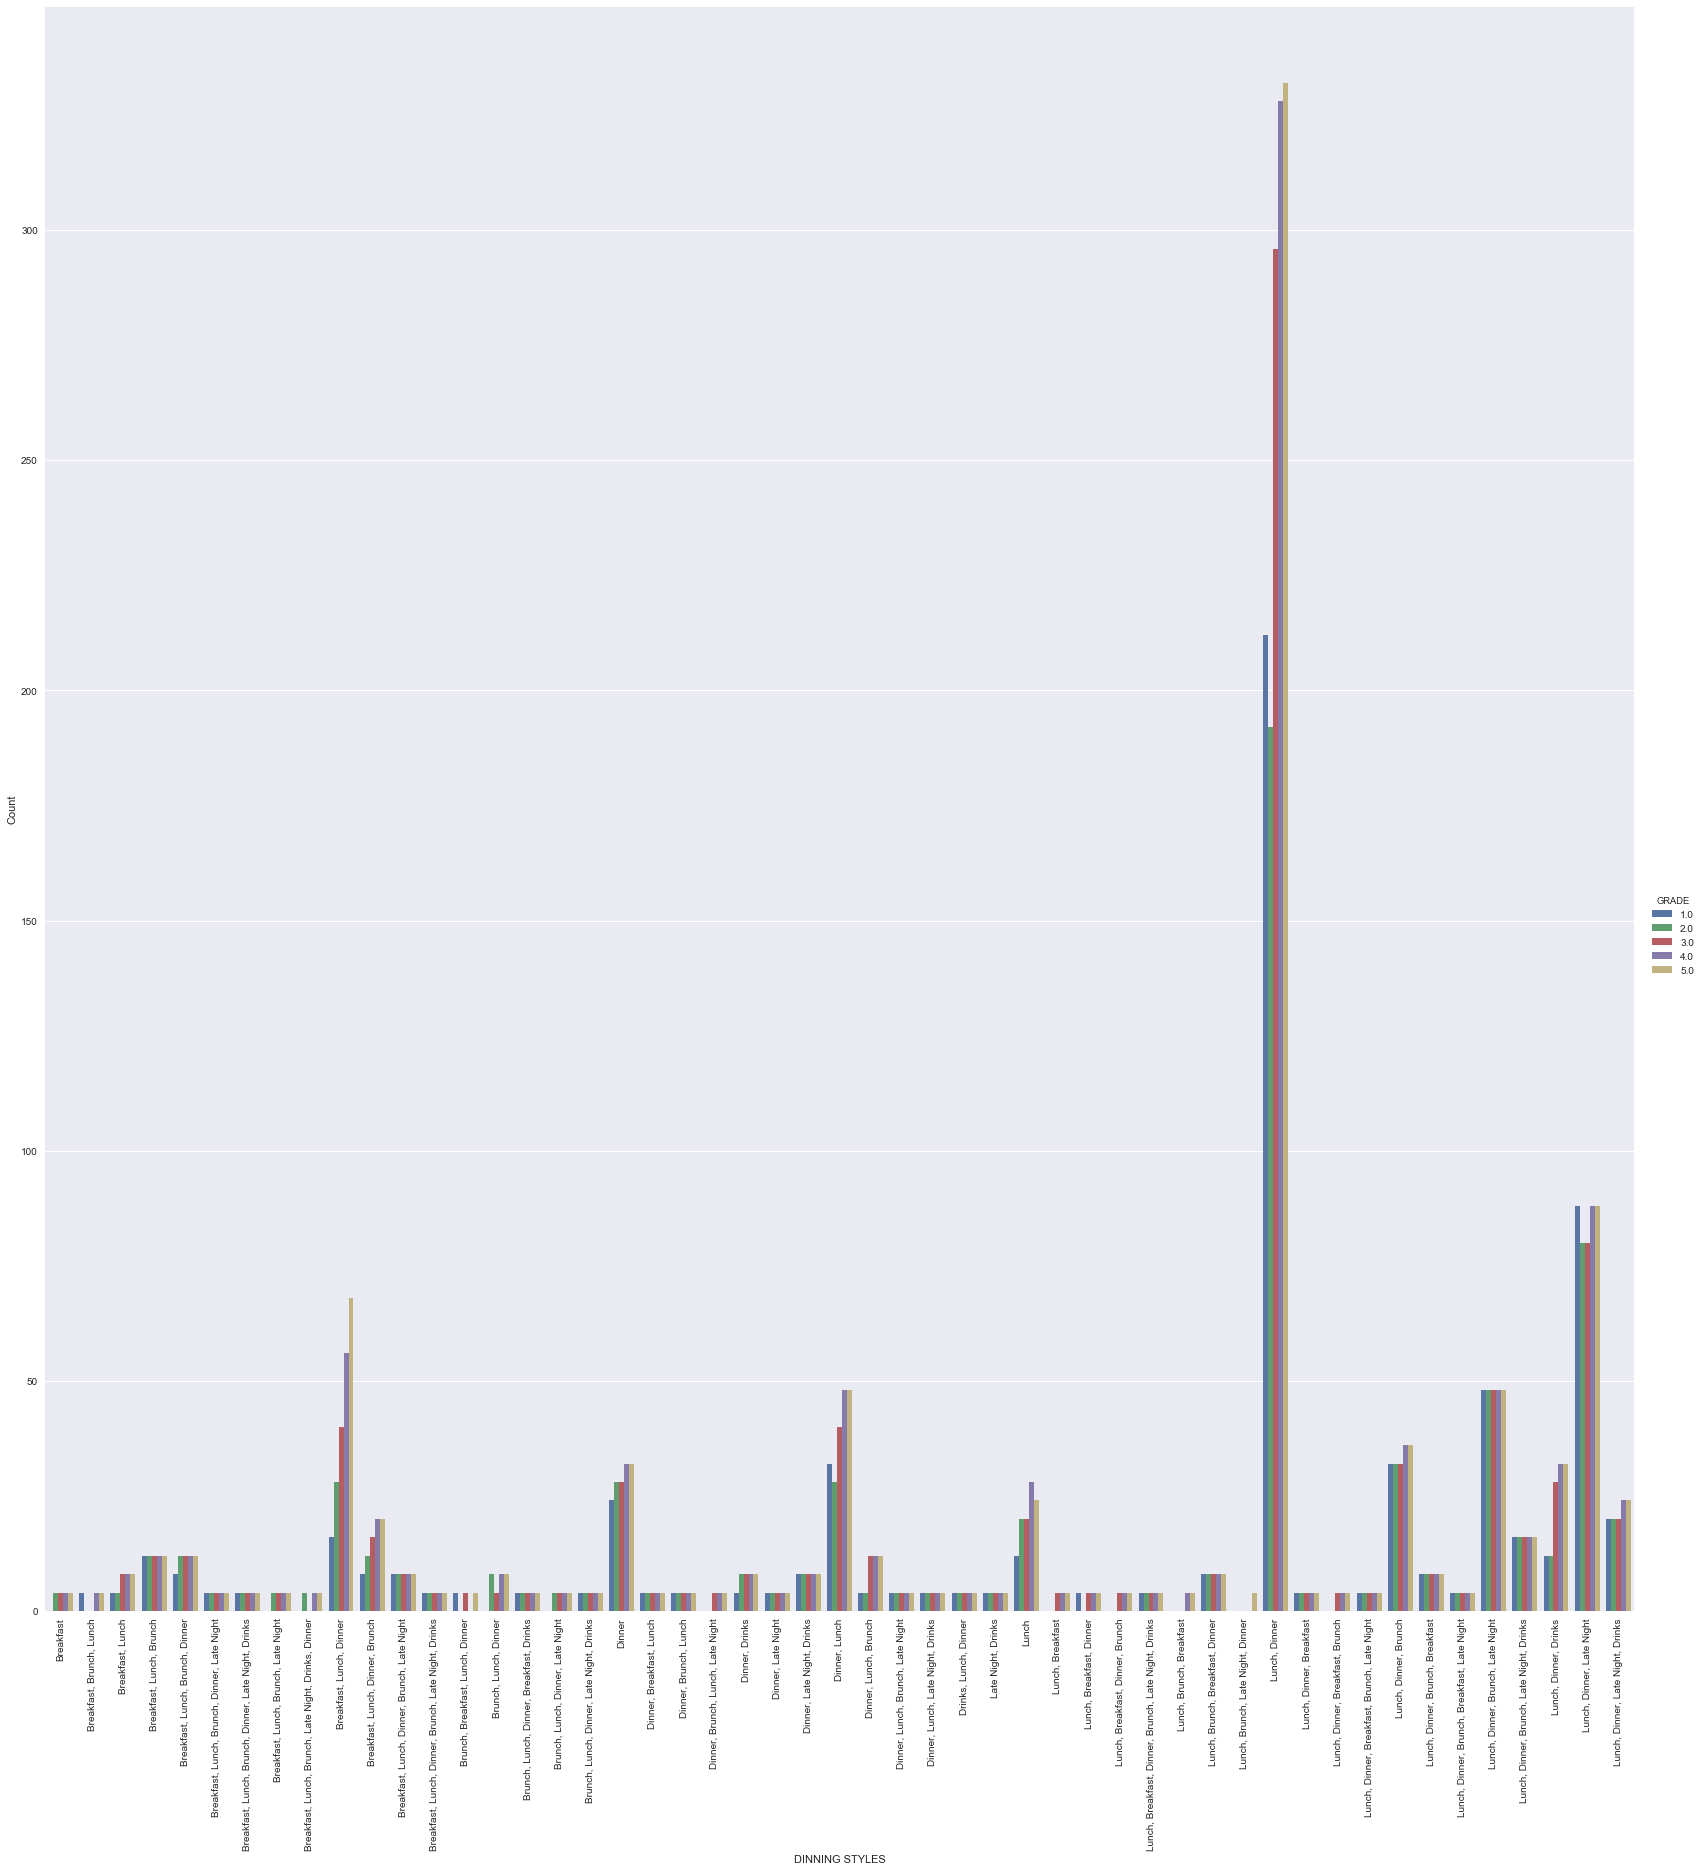

In [217]:
#Histogram of the dinning styles (for restaurants population and grades)
#data

a=pd.DataFrame({'Count' : data.groupby( ['DINNING STYLES','GRADE'] )['ADDRESS'].unique()}).reset_index()
a['Count'] = a['Count'].apply(lambda x: len(x))
bon= a[:-5]

bon

g= sns.factorplot(x='DINNING STYLES', y='Count', hue='GRADE', kind='bar', data=bon,size=23)
g.set_xticklabels(rotation=90)

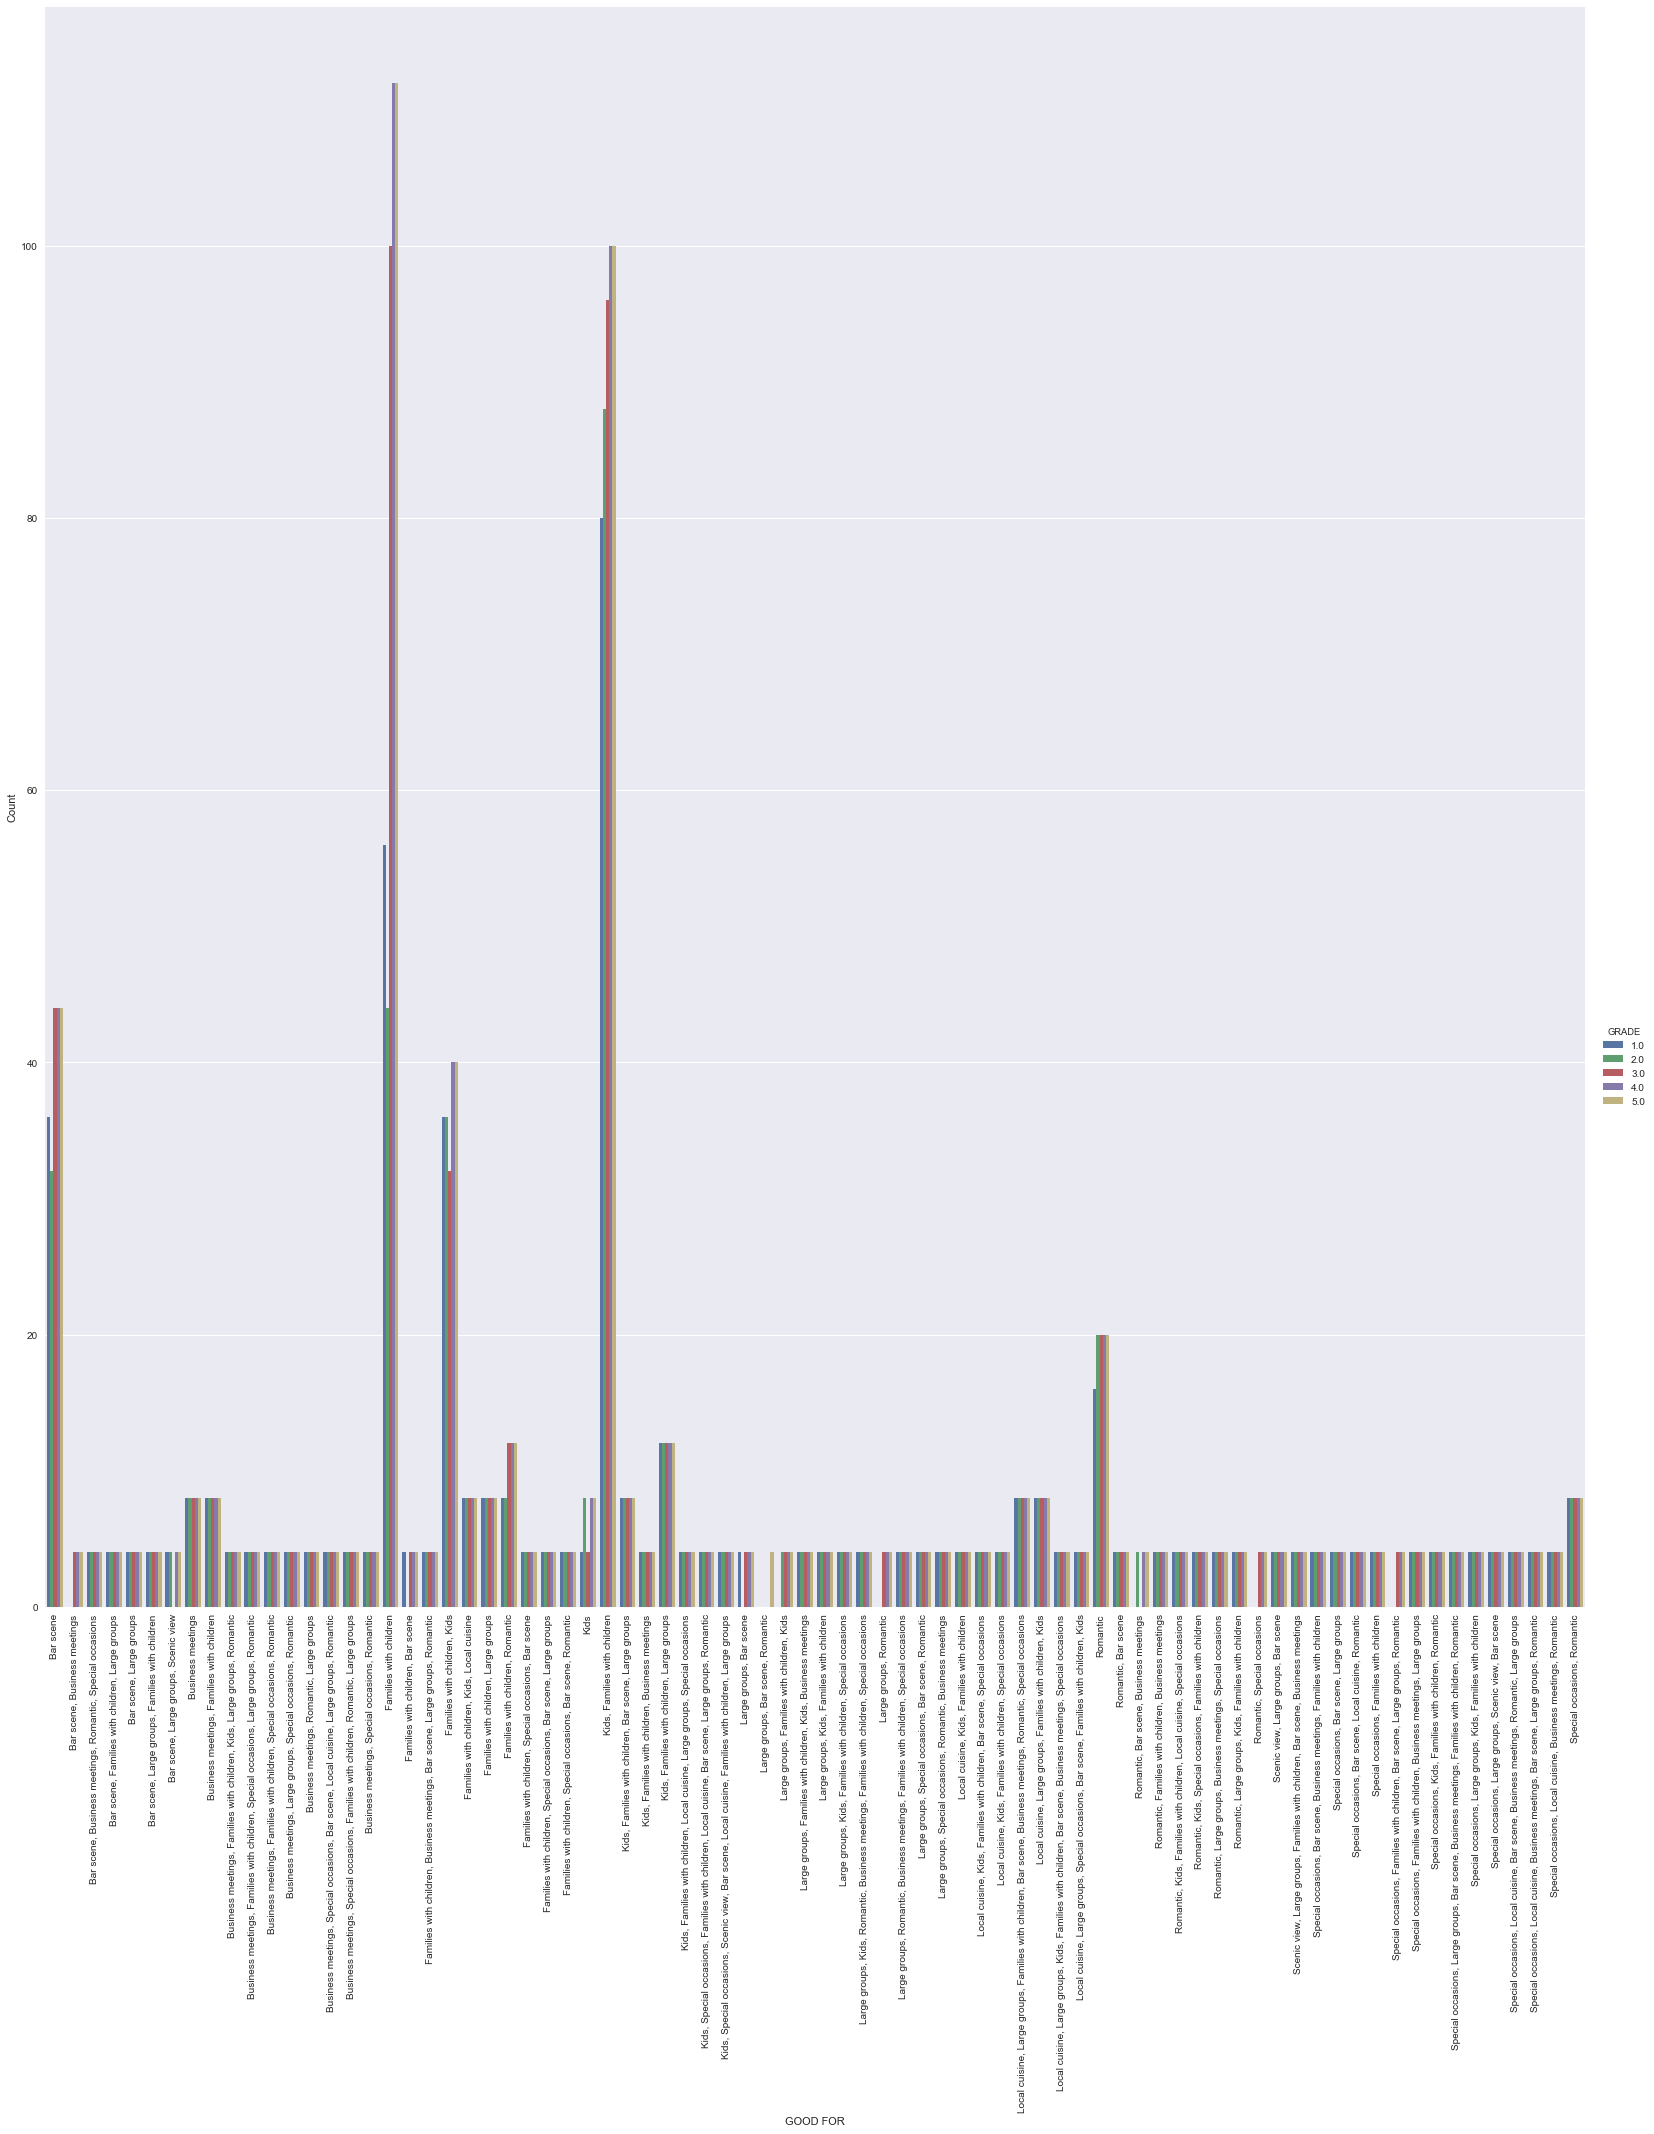

In [24]:
#Histogram of the restaurants according to the good for
a=pd.DataFrame({'Count' : data.groupby( ['GOOD FOR','GRADE'] )['ADDRESS'].unique()}).reset_index()
a['Count'] = a['Count'].apply(lambda x: len(x))
bon= a[:-5]

bon
g= sns.factorplot(x='GOOD FOR', y='Count', hue='GRADE', kind='bar', data=bon,size=23)
g.set_xticklabels(rotation=90)


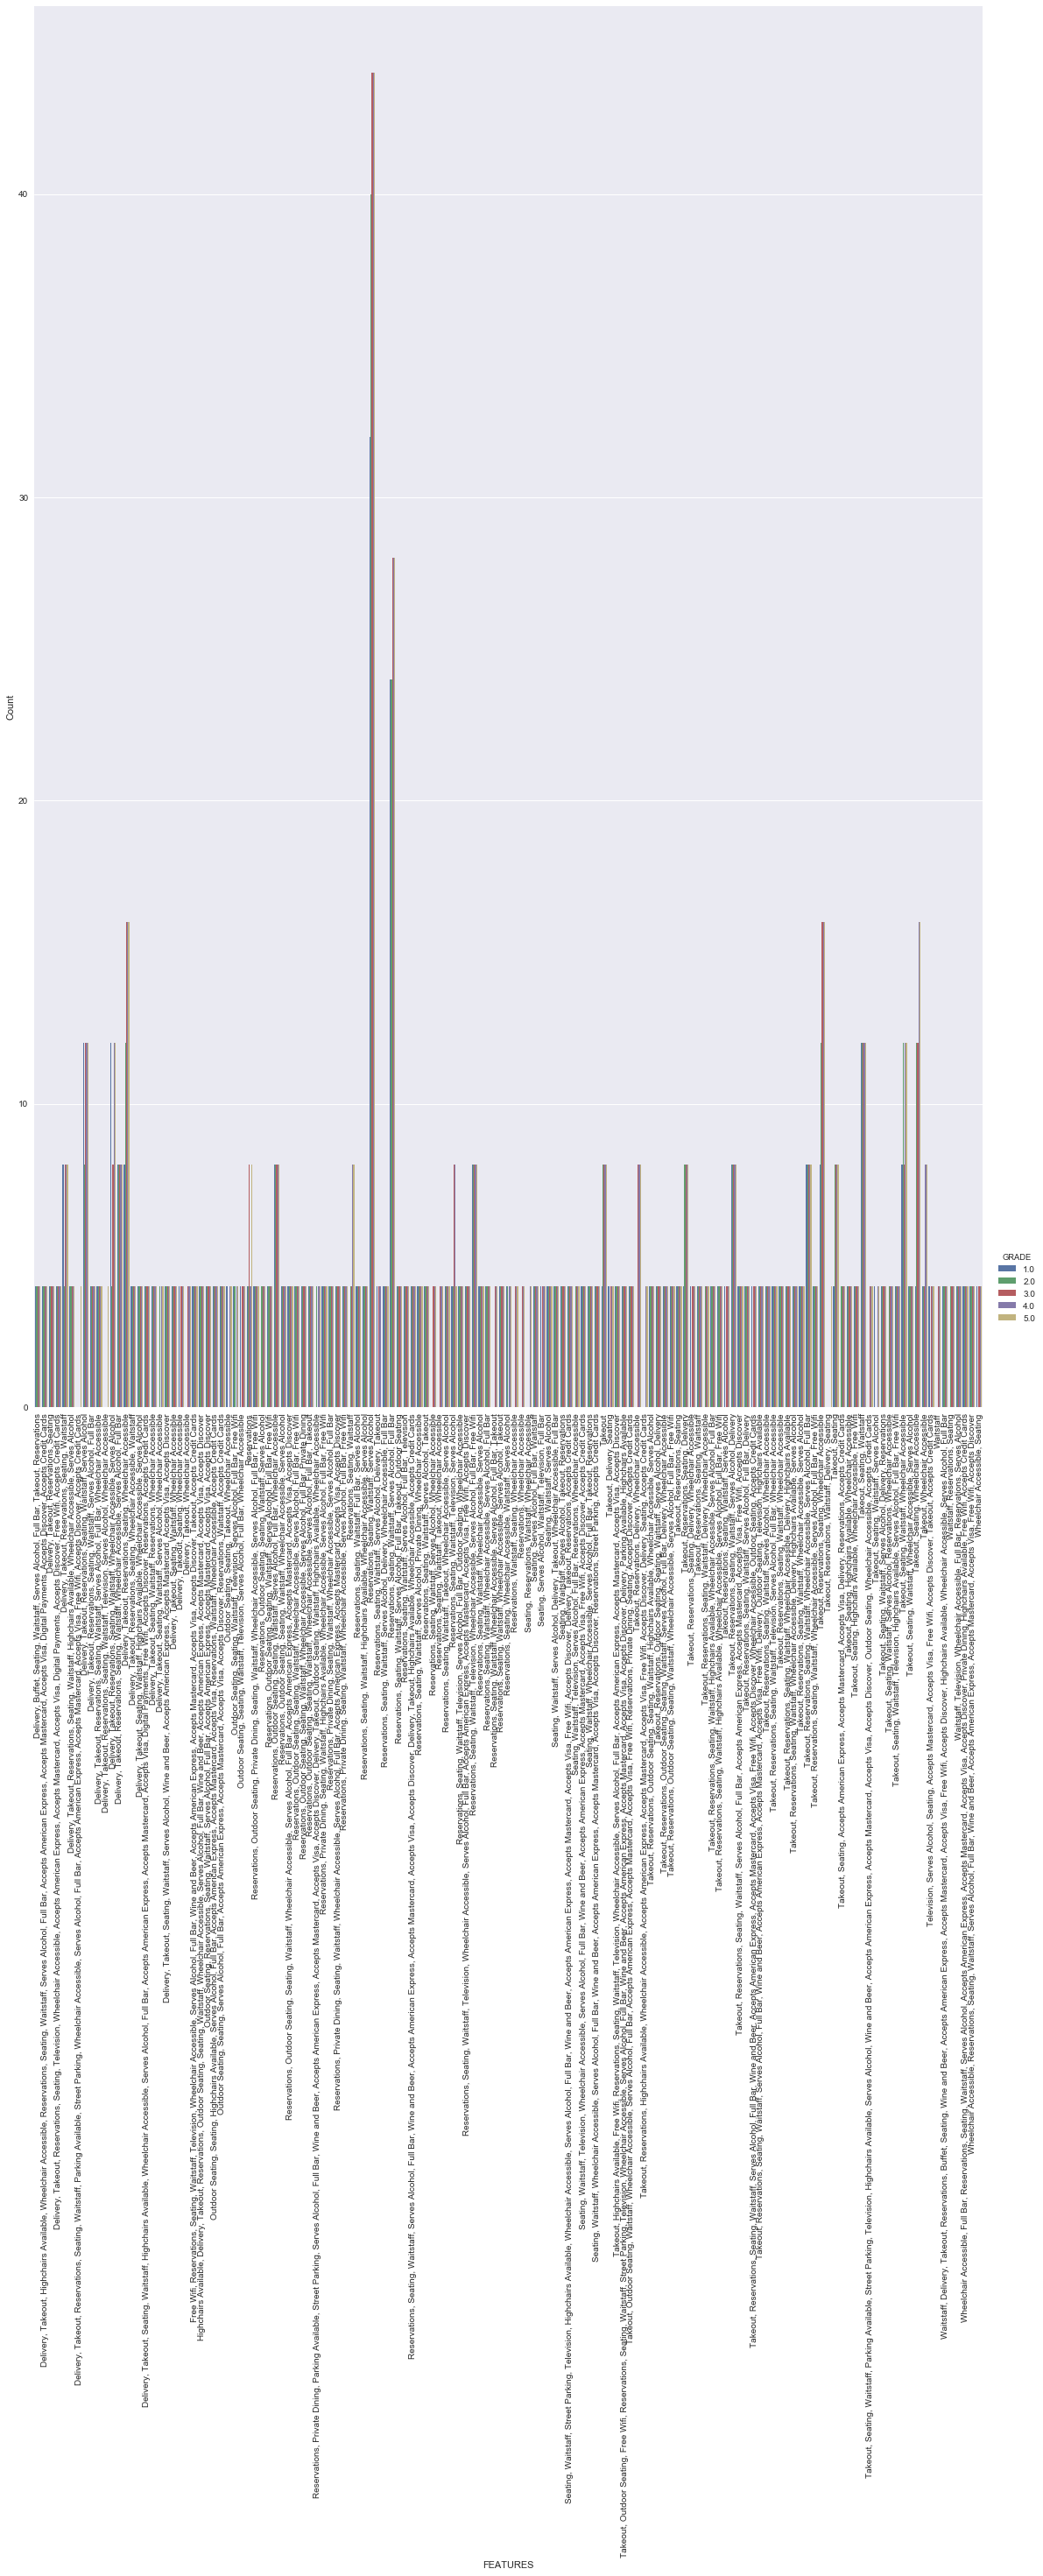

In [25]:
#Histogram of the restaurants according to the features
a=pd.DataFrame({'Count' : data.groupby( ['FEATURES','GRADE'] )['ADDRESS'].unique()}).reset_index()
a['Count'] = a['Count'].apply(lambda x: len(x))
bon= a[:-5]

bon
g= sns.factorplot(x='FEATURES', y='Count', hue='GRADE', kind='bar', data=bon,size=23)
g.set_xticklabels(rotation=90)

In [ ]:
#Final dataset
new.to_csv('Firstregression.csv')

In [171]:
# Comments treatment
data=pd.read_csv("/Users/juanfelipegonzalez/Desktop/DEFINITIF-BDD-DCJ-poule1.csv",sep=",",encoding="utf-8",engine="python")
data[" FOOD "]=data[" FOOD "].convert_objects(convert_numeric=True)
data[" FOOD "].mean()
data["SERVICE"].mean()
data["VALUE"].mean()
data["GRADE"]=data["GRADE"].convert_objects(convert_numeric=True)
data["GRADE"].mean();


from stop_words import get_stop_words
stop_en = get_stop_words('en')

data["VALID"] = data["COMMENT"].isnull()
data=data[~data["VALID"]]
set(list(data["COMMENT"].apply(lambda x: type(x))))

def clean_text(x):
    words = x.lower().split()
    words = [mot for mot in words if not mot in stop_en]
    words = [mot for mot in words if len(mot)>1]
    return words

data["CLEANED_TEXT"] = data["COMMENT"].apply(clean_text)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [173]:
data2=data.copy()
good_for= unique_column(data,"GOOD FOR")
dinning_style= unique_column(data,"DINNING STYLES")
features= unique_column(data,"FEATURES")
good_for= [' Business meetings', ' Romantic', ' Special occasions', ' Large groups', 
           'Families with children', ' Kids', ' Bar scene', ' Local cuisine',
           ' Scenic view']
dinning_style= ['Lunch', ' Dinner', ' Late Night', 'Breakfast',' Brunch', ' Drinks']
features=['Reservations', ' Private Dining', ' Wheelchair Accessible', 
          ' Serves Alcohol', 'Takeout', ' Television', ' Free Wifi',
          ' Delivery', ' Accepts Credit Cards', ' Outdoor Seating', 
          ' Buffet',' Parking Available']
split_columns(data2,"DINNING STYLES",dinning_style)
split_columns(data2,"GOOD FOR",good_for)
split_columns(data2,"FEATURES",features)


In [174]:
def conteur(x):
    c=0
    for mot in x:
        if mot=="great":
            c+=1
    return c

def conteur1(x):
    c=0
    for mot in x:
        if mot=="good":
            c+=1
    return c

def conteur2(x):
    c=0
    for mot in x:
        if mot=="nice":
            c+=1
    return c
def conteur3(x):
    c=0
    for mot in x:
        if mot=="delicious":
            c+=1
    return c

def conteur4(x):
    c=0
    for mot in x:
        if mot=="service":
            c+=1
    return c

def conteur5(x):
    c=0
    for mot in x:
        if mot=="wait":
            c+=1
    return c

In [175]:
#Add of more features: Specific words 
data2['Great'] = data2['CLEANED_TEXT'].apply(lambda x: conteur(x))
data2['Good'] = data2['CLEANED_TEXT'].apply(lambda x: conteur1(x))
data2['Delicious'] = data2['CLEANED_TEXT'].apply(lambda x: conteur3(x))
data2['Nice'] = data2['CLEANED_TEXT'].apply(lambda x: conteur2(x))
data2['Service'] = data2['CLEANED_TEXT'].apply(lambda x: conteur4(x))
data2['Wait'] = data2['CLEANED_TEXT'].apply(lambda x: conteur5(x))

In [176]:
a=data2.groupby(['ADDRESS']).mean()
a["VALUE"]=a["VALUE"].fillna(a["GRADE"]) 
a["SERVICE"]=a["SERVICE"].fillna(a["GRADE"]) 
a[" FOOD "]=a[" FOOD "].fillna(a["GRADE"]) 

,GRADE,VALUE,SERVICE,FOOD,NUMBER OF FOODS,MIN_PRICE,MAX_PRICE,VALID,Lunch,Dinner,...,AcceptsCreditCards,OutdoorSeating,Buffet,ParkingAvailable,Great,Good,Delicious,Nice,Service,Wait
ADDRESS,,,,,,,,,,,,,,,,,,,,,
1 E 75th St,4.000000,4.333333,4.333333,4.333333,4.0,10.0,15.0,False,1.0,0.0,...,0.0,1.0,0.0,0.0,0.416667,0.583333,0.083333,0.083333,0.083333,0.000000
1 Howard Street,4.500000,4.333333,5.000000,5.000000,6.0,10.0,50.0,False,1.0,1.0,...,0.0,1.0,0.0,1.0,0.125000,0.000000,0.000000,0.125000,0.375000,0.125000
1 Penn Plz,3.200000,5.000000,3.000000,5.000000,1.0,NaN,NaN,False,1.0,1.0,...,0.0,1.0,0.0,0.0,0.400000,0.000000,0.000000,0.000000,0.200000,0.000000
1 W 3rd St,4.500000,4.250000,4.750000,4.272727,1.0,NaN,NaN,False,1.0,1.0,...,0.0,0.0,0.0,0.0,0.590909,0.545455,0.000000,0.181818,0.181818,0.045455
1 W 59th St.,4.666667,4.666667,5.000000,5.000000,0.0,NaN,NaN,False,0.0,0.0,...,0.0,0.0,0.0,0.0,0.111111,0.222222,0.000000,0.111111,0.111111,0.000000
10 West 33rd street,5.000000,5.000000,5.000000,5.000000,0.0,NaN,NaN,False,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100 2nd Ave,4.155172,3.961538,4.384615,4.192308,2.0,30.0,NaN,False,1.0,1.0,...,0.0,0.0,0.0,0.0,0.258621,0.344828,0.068966,0.224138,0.344828,0.120690
100 Maiden Lane,3.769231,3.500000,3.500000,3.833333,2.0,7.0,12.0,False,1.0,1.0,...,0.0,0.0,0.0,0.0,0.307692,0.230769,0.076923,0.153846,0.384615,0.000000
100 Saint Marks Pl,3.882353,4.291667,4.000000,4.208333,3.0,5.0,10.0,False,1.0,1.0,...,0.0,0.0,0.0,0.0,0.176471,0.294118,0.039216,0.078431,0.058824,0.039216
